In [46]:
%matplotlib widget

In [47]:
import pandas as pd
import matplotlib.pyplot as plt

In [48]:
plt.style.use("ggplot")

In [49]:
# Create: User Parameters

path_results = "/Users/slane/Documents/research/results/cifar/autoencoder/lightning_logs/training/metrics.csv"

In [50]:
def load_data(path):

    return pd.read_csv(path)

In [51]:
data = load_data(path_results)

In [52]:
data

,lr-AdamW,step,train_error_step,epoch,valid_error_mse_step,valid_error_bce_step,valid_error_bce_epoch,valid_error_mse_epoch,train_error_epoch
0,0.001,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,0,1.115591,0.0,NaN,NaN,NaN,NaN,NaN
2,NaN,1,NaN,0.0,NaN,NaN,NaN,NaN,NaN
3,NaN,2,NaN,0.0,NaN,NaN,NaN,NaN,NaN
4,NaN,3,NaN,0.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
84827,NaN,70426,NaN,90.0,NaN,NaN,NaN,NaN,NaN
84828,NaN,70427,NaN,90.0,NaN,NaN,NaN,NaN,NaN
84829,NaN,70428,NaN,90.0,NaN,NaN,NaN,NaN,NaN
84830,NaN,70429,NaN,90.0,NaN,NaN,NaN,NaN,NaN


In [53]:
print("\n------ Column Names ------\n")
for ele in data.columns:
    print(ele)


------ Column Names ------

lr-AdamW
step
train_error_step
epoch
valid_error_mse_step
valid_error_bce_step
valid_error_bce_epoch
valid_error_mse_epoch
train_error_epoch


In [54]:
def plot_data(x_vals, y_vals, title, 
              x_label, y_label, y_lim=None, 
              fig_size=(10, 5), font_size=14):

    fig, ax = plt.subplots(figsize=fig_size)

    ax.plot(x_vals, y_vals, linewidth=5)

    ax.set_title("%s" % title)
    ax.set_xlabel("%s" % x_label)
    ax.set_ylabel("%s" % y_label)

    if y_lim is not None:
        ax.set_ylim(y_lim)

    fig.tight_layout()

/var/folders/mg/6jpxrx553k7bhdd572l6rly80000gn/T/ipykernel_1310/2613985069.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots(figsize=fig_size)


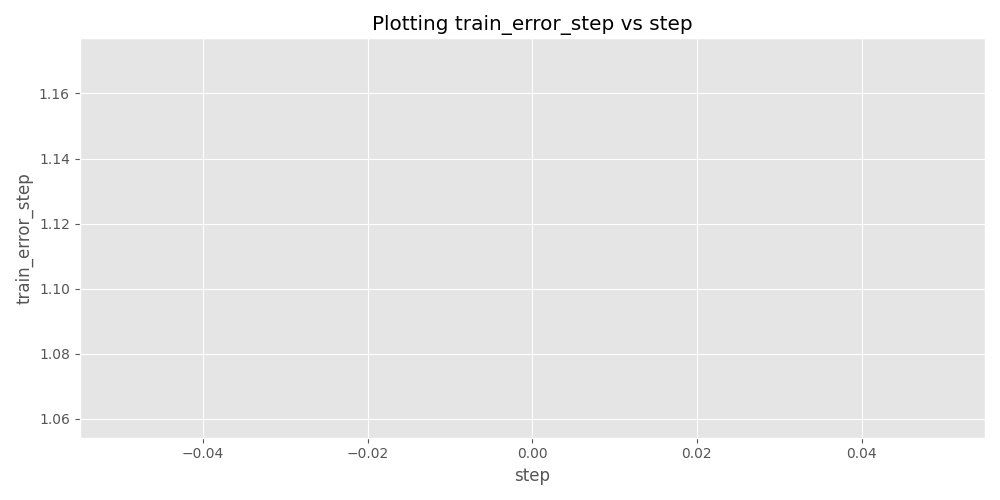

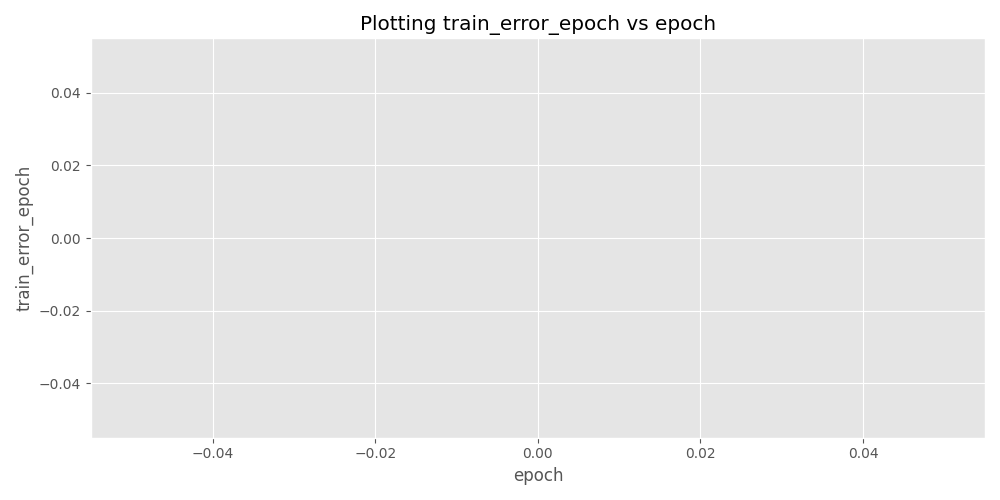

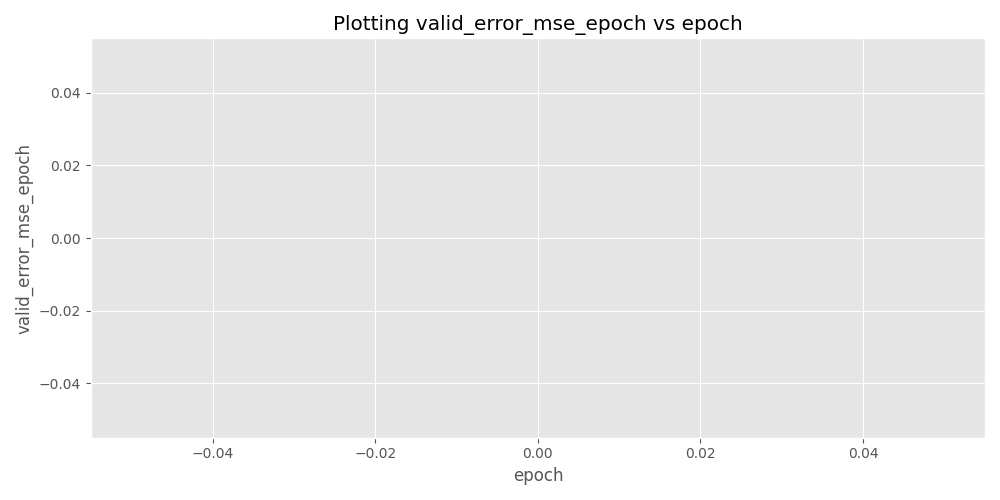

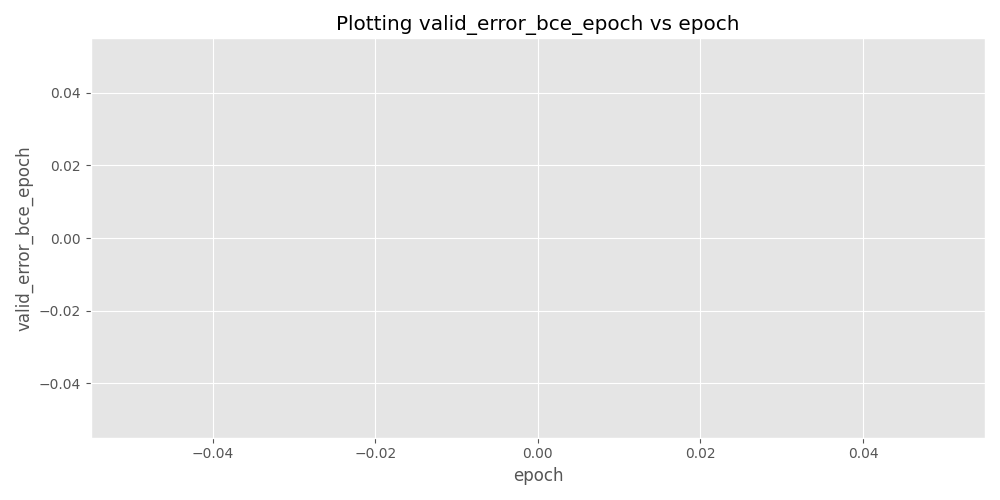

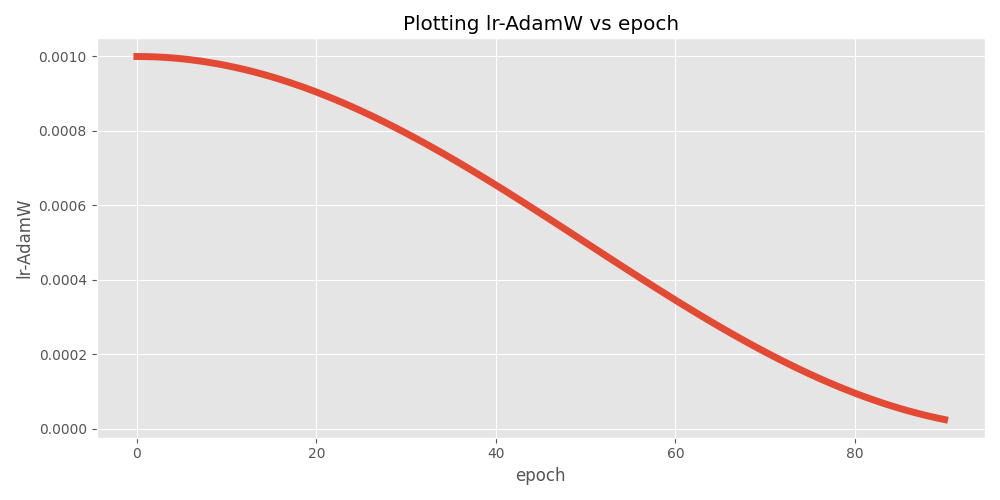

In [55]:
target_names = ["train_error_step", "train_error_epoch", "valid_error_mse_epoch", "valid_error_bce_epoch", "lr-AdamW"]

for name in target_names:

    df = data.dropna(subset=[name])
    
    if "lr" in name:
        tag = "epoch"
        x_vals = list(range(df.shape[0]))
    else:
        tag = name.split("_")[-1]
        x_vals = df[tag]
    
    y_vals = df[name]

    title = "Plotting %s vs %s" % (name, tag)
    y_label = "%s" % name
    x_label = "%s" % tag

    y_lim = (-0.005, 1.05) if "accuracy" in name else None
    plot_data(x_vals, y_vals, title, x_label, y_label, y_lim=y_lim)